In [98]:
# --------------Imports-----------------
# NumPy is a Python library used for working with arrays
import numpy as np

# Kunna hantera bilder
from IPython.display import Image 

# För att kunna plotta datan
import matplotlib.pyplot as plt

import random

from sklearn.model_selection import train_test_split

from sympy import expand, symbols

from sklearn.dummy import check_random_state

from gplearn.genetic import SymbolicRegressor

from gplearn.functions import make_function

# Gör det möjligt att plotta trädet
import graphviz

In [99]:

Image(url="Spalding.png") 



/var/folders/01/yj6c57gj6zg7f6gkhtv245600000gn/T/ipykernel_5648/3747733839.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


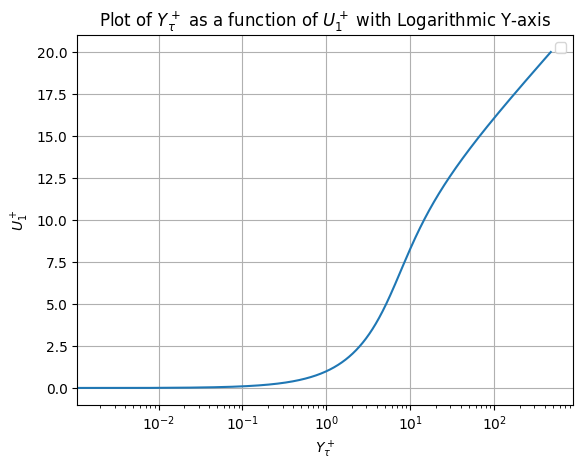

In [142]:

# constant values taken 
U_1_plus = np.linspace(0, 20, 10_000) 

C = 5
kappa = 0.41

# Y_plus_tau(U_1_plus)
Y_plus_tau = U_1_plus + np.exp(-kappa*C) * (
    np.exp(kappa*U_1_plus) -1 
    - kappa* U_1_plus 
    - 1/2*(kappa*U_1_plus)**2
    - 1/6 * (kappa * U_1_plus )**3)

plt.plot( Y_plus_tau, U_1_plus)
plt.xscale('log') 
plt.xlabel(r'$Y^+_{\tau}$')
plt.ylabel(r'$U^+_1$')
plt.title(r'Plot of $Y^+_{\tau}$ as a function of $U^+_1$ with Logarithmic Y-axis')
plt.grid(True)
plt.legend()
plt.show()


In [143]:
# --------------Make a traning and testing set in the plane-----------------

# Reshape data for the regression model
U_1_plus = U_1_plus.reshape(-1, 1)
Y_plus_tau = Y_plus_tau.reshape(-1, 1)

print(Y_plus_tau)

X_train, X_test, y_train, y_test = train_test_split(U_1_plus, Y_plus_tau, test_size=0.1,random_state=1)



[[0.00000000e+00]
 [2.00020002e-03]
 [4.00040004e-03]
 ...
 [4.70611803e+02]
 [4.70993198e+02]
 [4.71374907e+02]]


In [158]:

# Step 1: Define the custom exponential function with clipping
def custom_exp(x1):
    """Perform element-wise exponential function using numpy with input clipping to avoid overflow."""
    # Clip the input to a range that prevents overflow in the exponential function
    x1 = np.clip(x1, -20, 20)
    return np.exp(x1)


# Step 2: Make the function node with make_function()
# Ensure that the exponential function returns finite results to prevent overflow issues

exp_function = make_function(function=custom_exp, name='exp', arity=1, wrap=False)

function_set = ['add', 'sub', 'mul', 'div', 'log', 'neg', exp_function ]

print('hello')

est_gp = SymbolicRegressor(population_size=2000,
                           generations=100, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.15,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.5, random_state=0,
                           function_set= function_set
                           )

est_gp.fit(U_1_plus,Y_plus_tau )

print(est_gp._program)

hello
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/Users/oskardahlstedt/ml/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   0    18.45       6.1175e+21       23          17.9857          19.0944      9.29m
   1     9.23      1.02351e+08       29          17.0992          16.7039      7.54m
   2    10.13      2.55687e+07       22          15.2977          16.6952      7.63m
   3    16.61      2.64905e+07       27          12.5338          13.3185      9.21m
   4    17.53      1.59632e+07       21          11.9199          11.9676     10.23m
   5    13.51      2.43906e+07       14          11.6665          12.8747      8.24m
   6    11.35      3.47826e+07       14          11.8509          11.2155      7.58m
   7    10.12      4.68526e+07       17          10.6551          10.4018      9.61m
   8    10.89      4.38491e+07       17          10.6007          10.8916      8.26m
   9    11.56       3.3392e+07       17          10.5857          11.0263      8.19m
  10    12.50      2.72477e+07       16           10.475          10.2558      8.02m
  11    12.83      2.17662e+07       18          9.58478         

In [159]:
import sympy as sp

# Define the symbolic variable
X0 = sp.symbols('X0')

# Define the converter for sympy functions
converter = {
    'add': lambda x, y: x + y,
    'sub': lambda x, y: x - y,
    'mul': lambda x, y: x * y,
    'div': lambda x, y: x / y,
    'neg': lambda x: -x,
    'exp': sp.exp,
    'log': sp.log
}

# The extremely complex expression
expr_str = "exp(log(sub(X0, mul(sub(sub(mul(X0, X0), X0), X0), sub(log(X0), mul(0.200, X0))))))"

# Convert the string expression to a sympy expression using the converter
expr = sp.sympify(expr_str, locals=converter)

# Simplify the expression
simplified_expr = sp.simplify(expr)

print("Simplified Expression:")
print(simplified_expr)


Simplified Expression:
X0*((0.2*X0 - log(X0))*(X0 - 2) + 1)


U*((0.2*U - log(U))*(U - 2) + 1)


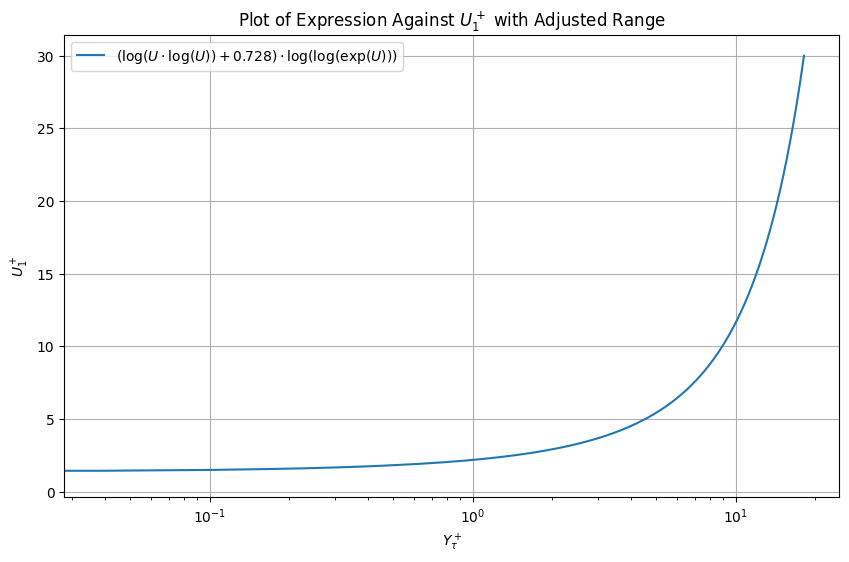

Simplified Expression:
(log(log(U**U)) + 0.728)*log(U)


In [161]:
# --------------Playing around with sympy to expand the expression -----------------


import sympy as sp

# Define symbolic variables
U = symbols('U')


converter = {
    'sub': lambda x, y : x - y,
    'div': lambda x, y : x/y,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x    : -x,
    'pow': lambda x, y : x**y,
    'log': sp.log, 
    'exp': sp.exp
}

#print(sympy.sympify('sqrt(div(add(1.000, sub(div(sqrt(log(0.978)), X0), mul(-0.993, X0))), add(-0.583, 0.592)))', locals=converter))

# Extract the most fit individual
best_program = est_gp._program

expr = sp.sympify(str(best_program), locals=converter)

U = sp.symbols('U')
expr= expr.subs('X0', U)

simplified_expr = sp.simplify(expr)



print(simplified_expr)

#print(sympy.sympify(str(best_program), locals=converter))

# Print the symbolic expression of the best individual
#print("Best symbolic expression:", best_program)
# Define the symbolic variable

U = sp.symbols('U', real=True, positive=True)

# Define the expression
expr = (sp.log(U * sp.log(U)) + 0.728) * sp.log(sp.log(sp.exp(U)))

# Convert the symbolic expression to a numerical function using lambdify
expr_func = sp.lambdify(U, expr, 'numpy')


# Adjust the range to avoid log(0) and log of negative values
U_1_plus = np.linspace(1.1, 30, 500)  # Start from 1.1 to avoid log(1) being zero

# Recalculate Y values using the adjusted range
Y_values = expr_func(U_1_plus)

# Plot the adjusted expression
plt.figure(figsize=(10, 6))
plt.plot( Y_values,U_1_plus, label=r'$(\log(U \cdot \log(U)) + 0.728) \cdot \log(\log(\exp(U)))$')
plt.xlabel(r'$Y^+_{\tau}$')
plt.ylabel(r'$U^+_1$')
plt.xscale('log') 
plt.title('Plot of Expression Against $U^+_1$ with Adjusted Range')
plt.grid(True)
plt.legend()
plt.show()



# Simplify the expression
simplified_expr = sp.simplify(expr)

print("Simplified Expression:")
print(simplified_expr)




In [69]:
# Generate the DOT data (assuming est_gp is defined and has _program.export_graphviz())
dot_data = est_gp._program.export_graphviz()
# Create a Graphviz Source object
graph = graphviz.Source(dot_data)

graph.view()  # Opens the graph in the default viewer

print(est_gp._program.parents)

idx = est_gp._program.parents['donor_idx']
fade_nodes = est_gp._program.parents['donor_nodes']
dot_data = est_gp._programs[-2][idx].export_graphviz(fade_nodes=fade_nodes)
graph = graphviz.Source(dot_data)
graph.view()

{'method': 'Point Mutation', 'parent_idx': np.int64(1611), 'parent_nodes': []}


KeyError: 'donor_idx'